In [1]:
#  Data comes from: 
#  https://www.fcc.gov/general/broadband-deployment-data-fcc-form-477
#  https://www.fcc.gov/reports-research/reports/measuring-broadband-america/charts-measuring-broadband-america-2016

In [2]:
import pandas as pd
import numpy as np
import plotnine as p9

In [64]:
maryland = pd.read_csv("MD_advertised.csv")
download = pd.read_csv("MD_down_county.csv")
upload = pd.read_csv("MD_up_county.csv")
nation = pd.read_csv("Nationwide Averages.csv")
county_advertised = pd.read_csv("county_advertised.csv")

In [4]:
maryland.head()

,DBAName,MaxAdDown,MaxAdUp
0,Global Telecom Brokers,0.0,0.0
1,Global Telecom Brokers,0.0,0.0
2,Global Telecom Brokers,0.0,0.0
3,Global Telecom Brokers,0.0,0.0
4,Global Telecom Brokers,0.0,0.0


In [5]:
advertised = maryland[['DBAName', 'MaxAdDown', 'MaxAdUp']].groupby(['DBAName']).agg(['mean'])

In [6]:
advertised.head()

,MaxAdDown,MaxAdUp
,mean,mean
DBAName,,
24/7 Mid-Atlantic Network,0.0,0.0
ALTIUS Broadband,50.0,50.0
"Access One, Inc.",0.0,0.0
All Points Broadband,15.0,4.0
Allied Telecom Group LLC,0.0,0.0


In [7]:
advertised.columns = advertised.columns.droplevel(1)
print(advertised.head())
advertised = advertised.reset_index()
print(advertised.head())

                           MaxAdDown  MaxAdUp
DBAName                                      
24/7 Mid-Atlantic Network        0.0      0.0
ALTIUS Broadband                50.0     50.0
Access One, Inc.                 0.0      0.0
All Points Broadband            15.0      4.0
Allied Telecom Group LLC         0.0      0.0
                     DBAName  MaxAdDown  MaxAdUp
0  24/7 Mid-Atlantic Network        0.0      0.0
1           ALTIUS Broadband       50.0     50.0
2           Access One, Inc.        0.0      0.0
3       All Points Broadband       15.0      4.0
4   Allied Telecom Group LLC        0.0      0.0


In [8]:
nation.head()

,Type of connection,ISP,Median Down. Speed(Mpbs),Max Advertised speed(Mpbs)
0,DSL,AT&T - DSL,3.81,185.0
1,DSL,AT&T - IPBB,15.38,468.0
2,DSL,CenturyLink,10.07,349.0
3,DSL,Frontier DSL,3.54,116.0
4,DSL,Verizon DSL,2.48,59.0


In [9]:
download.head()

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Download,Max_Download,Ave_Download,SHAPEarea,SHAPElen
0,1,Allegany,383,0,225930,8696.577023,1.824785e+09,4.671261e+05
1,2,Anne Arundel,1904,0,208803,16184.321429,1.778026e+09,1.254422e+06
2,3,Baltimore,2610,0,262450,18535.531801,2.608355e+09,1.183828e+06
3,4,Baltimore City,1955,27,175997,11553.283887,3.513710e+08,2.510998e+05
4,5,Calvert,319,47,54814,12195.250784,9.087738e+08,4.525549e+05


In [10]:
upload.head()

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Upload,Max_Upload,Ave_Upload,SHAPEarea,SHAPElen
0,1,Allegany,383,34,38015,2683.971279,1.824785e+09,4.671261e+05
1,2,Anne Arundel,1904,46,71204,5996.515756,1.778026e+09,1.254422e+06
2,3,Baltimore,2610,49,216038,5613.704981,2.608355e+09,1.183828e+06
3,4,Baltimore City,1955,5,84693,3227.357545,3.513710e+08,2.510998e+05
4,5,Calvert,319,50,11656,2883.808777,9.087738e+08,4.525549e+05


In [11]:
county_data= pd.merge(download, upload[['Min_Upload', 'Max_Upload', 'Ave_Upload', 'C0_NAME']], on='C0_NAME') 

In [12]:
county_data.head()

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Download,Max_Download,Ave_Download,SHAPEarea,SHAPElen,Min_Upload,Max_Upload,Ave_Upload
0,1,Allegany,383,0,225930,8696.577023,1.824785e+09,4.671261e+05,34,38015,2683.971279
1,2,Anne Arundel,1904,0,208803,16184.321429,1.778026e+09,1.254422e+06,46,71204,5996.515756
2,3,Baltimore,2610,0,262450,18535.531801,2.608355e+09,1.183828e+06,49,216038,5613.704981
3,4,Baltimore City,1955,27,175997,11553.283887,3.513710e+08,2.510998e+05,5,84693,3227.357545
4,5,Calvert,319,47,54814,12195.250784,9.087738e+08,4.525549e+05,50,11656,2883.808777


In [13]:
county_data.drop(['SHAPEarea','SHAPElen'], axis=1)

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Download,Max_Download,Ave_Download,Min_Upload,Max_Upload,Ave_Upload
0,1,Allegany,383,0,225930,8696.577023,34,38015,2683.971279
1,2,Anne Arundel,1904,0,208803,16184.321429,46,71204,5996.515756
2,3,Baltimore,2610,0,262450,18535.531801,49,216038,5613.704981
3,4,Baltimore City,1955,27,175997,11553.283887,5,84693,3227.357545
4,5,Calvert,319,47,54814,12195.250784,50,11656,2883.808777
5,6,Caroline,141,0,61143,6603.574468,30,14328,1556.957447
6,7,Carroll,637,0,77593,9562.478807,15,62932,2677.238619
7,8,Cecil,247,40,85826,7612.412955,9,83685,2374.202429
8,9,Charles,929,0,160807,7623.145318,14,37232,2107.238967
9,10,Dorchester,185,23,38422,6961.681081,5,13479,2485.572973


In [14]:
county_data['Ave_Download'].mean()

10259.033498990413

In [15]:
county_data['Ave_Upload'].mean()

3061.5377979925

In [16]:
advertised['MaxAdDown'].mean()

56.616181548935174

In [17]:
advertised['MaxAdUp'].mean()

30.192018426868653

C:\Users\sr117\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\sr117\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\sr117\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


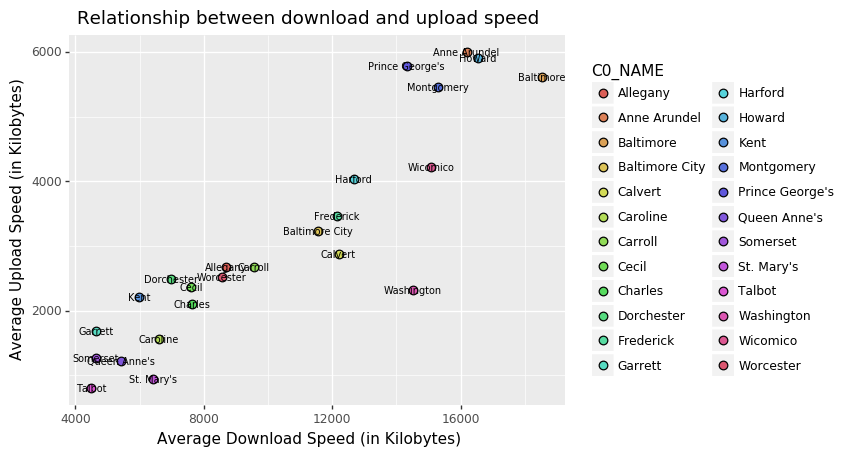

<ggplot: (-9223371930146071829)>

In [18]:
(p9.ggplot(county_data) +
    p9.aes(x = 'Ave_Download', y = 'Ave_Upload', fill = 'C0_NAME') +
    p9.geom_point(size = 3) + 
    p9.geom_text(p9.aes(label='C0_NAME'),size = 7) + 
    p9.ggtitle('Relationship between download and upload speed') +
    p9.ylab('Average Upload Speed (in Kilobytes)') +
    p9.xlab('Average Download Speed (in Kilobytes)'))

C:\Users\sr117\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\sr117\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\sr117\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\sr117\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


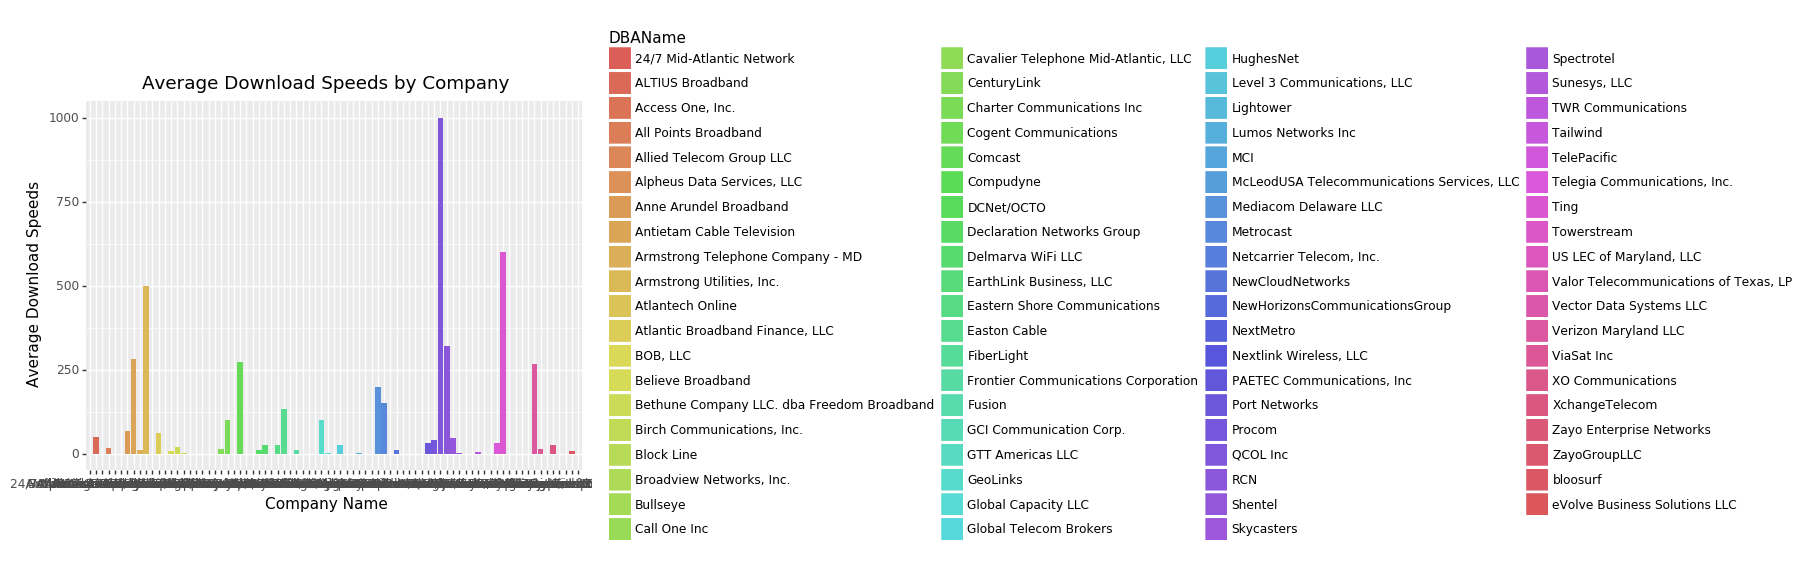

<ggplot: (106708705421)>

In [19]:
(p9.ggplot(advertised) + 
  p9.aes(x='DBAName', y='MaxAdDown', fill='DBAName') +
  p9.geom_bar(position='dodge',stat="identity")+
  p9.ggtitle('Average Download Speeds by Company') +
    p9.ylab('Average Download Speeds') +
    p9.xlab('Company Name')
)

In [88]:
montgomery= county_advertised.loc[county_advertised['county'] == 'Montgomery ']

In [66]:
montgomery

,county,ISP,up_speed,down_speed
0,Montgomery,Comcast Xfinity,3500,100000
1,Montgomery,Verizon High Speed,300,300
2,Montgomery,Verizon Fios,94000,94000


In [67]:
mont_up= montgomery['up_speed'].mean()
mont_down=montgomery['down_speed'].mean()

In [68]:
pg= county_advertised.loc[county_advertised['county'] == "Prince Geroge's"]

In [69]:
pg.head()

,county,ISP,up_speed,down_speed
3,Prince Geroge's,Comcast Xfinity,1000,40000
4,Prince Geroge's,Verizon High Speed,300,1500
5,Prince Geroge's,Verizon Fios,94000,94000


In [70]:
pg_up=pg['up_speed'].mean()
pg_down=pg['down_speed'].mean()

In [71]:
carroll= county_advertised.loc[county_advertised['county'] == "Carroll"]

In [72]:
carroll

,county,ISP,up_speed,down_speed
6,Carroll,Comcast Xfinity,3500,100000
7,Carroll,Ting,100000,100000
8,Carroll,Verizon High Speed,300,300


In [73]:
carroll_up=carroll['up_speed'].mean()
carroll_down=carroll['down_speed'].mean()

In [74]:
talbot= county_advertised.loc[county_advertised['county'] == "Talbot"]

In [75]:
talbot_up=talbot['up_speed'].mean()
talbot_down=talbot['down_speed'].mean()

In [78]:
county_advertised_scrape=pd.DataFrame({'county':['Montgomery', "Prince George's", 'Carroll', 'Talbot'], 'ADV_AVG_UP':[mont_up, pg_up, carroll_up, talbot_up], 'ADV_AVG_DOWN':[mont_down, pg_down, carroll_down, talbot_down]})

In [79]:
county_advertised_scrape

,county,ADV_AVG_UP,ADV_AVG_DOWN
0,Montgomery,32600.000000,64766.666667
1,Prince George's,31766.666667,45166.666667
2,Carroll,34600.000000,66766.666667
3,Talbot,766.666667,12433.333333


In [93]:
limited_counties=county_data

In [97]:
limited_counties= limited_counties.drop([0,1,2,3,4,5, 7,8,9,10,11,12, 13, 14, 17, 18, 19,21, 22,23])

In [98]:
limited_counties=limited_counties.reset_index(drop=True)

In [99]:
limited_counties

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Download,Max_Download,Ave_Download,SHAPEarea,SHAPElen,Min_Upload,Max_Upload,Ave_Upload
0,7,Carroll,637,0,77593,9562.478807,1.960703e+09,3.948648e+05,15,62932,2677.238619
1,16,Montgomery,3967,0,167328,15279.234686,2.142120e+09,5.116244e+05,4,85400,5456.099824
2,17,Prince George's,1410,10,238631,14313.640426,2.072469e+09,4.332504e+05,8,135334,5787.687234
3,21,Talbot,273,21,35443,4489.622711,1.150324e+09,1.405312e+06,3,8691,803.443223


In [100]:
merged_counties=limited_counties.merge(county_advertised_scrape, left_on='C0_NAME', right_on='county', how='inner')

In [101]:
merged_counties

,OBJECTID,C0_NAME,Cnt_C0_NAME,Min_Download,Max_Download,Ave_Download,SHAPEarea,SHAPElen,Min_Upload,Max_Upload,Ave_Upload,county,ADV_AVG_UP,ADV_AVG_DOWN
0,7,Carroll,637,0,77593,9562.478807,1.960703e+09,3.948648e+05,15,62932,2677.238619,Carroll,34600.000000,66766.666667
1,16,Montgomery,3967,0,167328,15279.234686,2.142120e+09,5.116244e+05,4,85400,5456.099824,Montgomery,32600.000000,64766.666667
2,17,Prince George's,1410,10,238631,14313.640426,2.072469e+09,4.332504e+05,8,135334,5787.687234,Prince George's,31766.666667,45166.666667
3,21,Talbot,273,21,35443,4489.622711,1.150324e+09,1.405312e+06,3,8691,803.443223,Talbot,766.666667,12433.333333


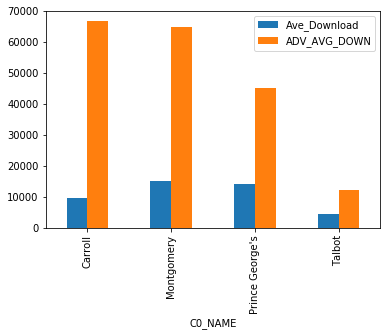

In [115]:
merged_counties.plot.bar(x='C0_NAME', y=['Ave_Download', 'ADV_AVG_DOWN'])

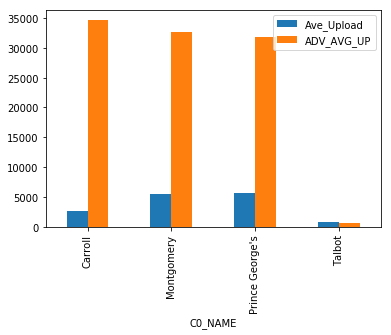

In [116]:
merged_counties.plot.bar(x='C0_NAME', y=['Ave_Upload', 'ADV_AVG_UP'])